# Big Data Mart Sales Problem
Problem Statement: The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role 

# Atrribute information

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading train and test data 
df_train= pd.read_csv('bigdatamart_train.csv')
df_test= pd.read_csv('bigdatamart_test.csv')
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
print(df_test)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198 

In [4]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [6]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
df_train.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df_train['source'] = 'Train'
df_test['source'] = 'Test'
df=pd.concat([df_train,df_test],ignore_index=True)

In [10]:
df.shape

(14204, 13)

In [11]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train


In [12]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,Test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,Test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,Test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,Test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,Test


In [13]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

# Data Wrangling and Data cleaning 

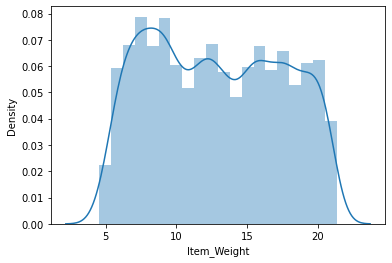

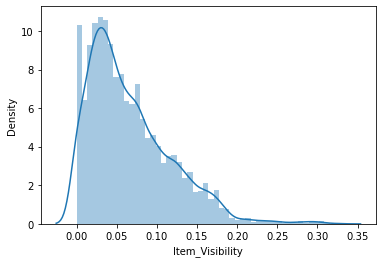

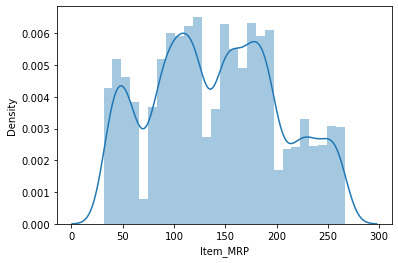

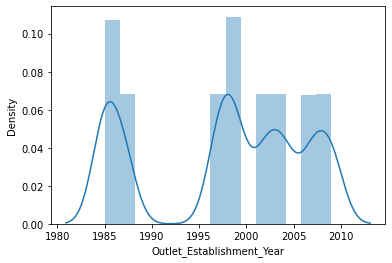

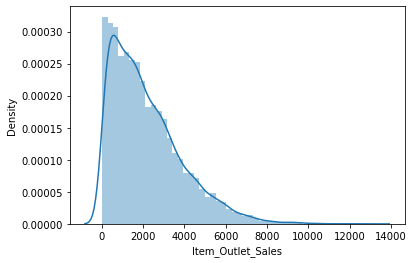

In [14]:
for i in df_train.describe().columns:
    sns.distplot(df_train[i].dropna())
    plt.show()

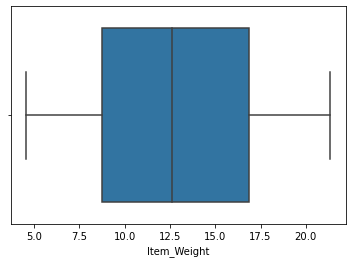

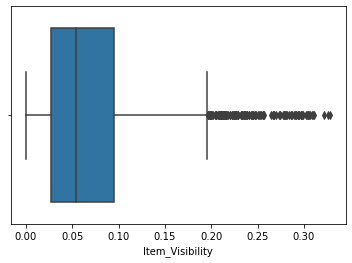

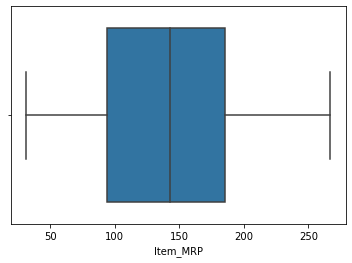

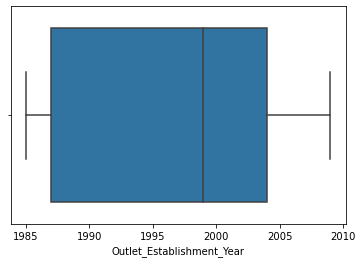

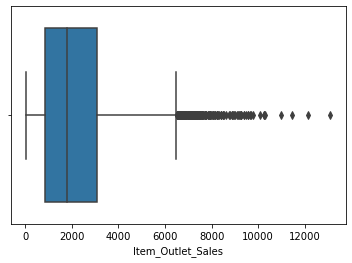

In [15]:
for i in df_train.describe().columns:
    sns.boxplot(df_train[i].dropna())
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

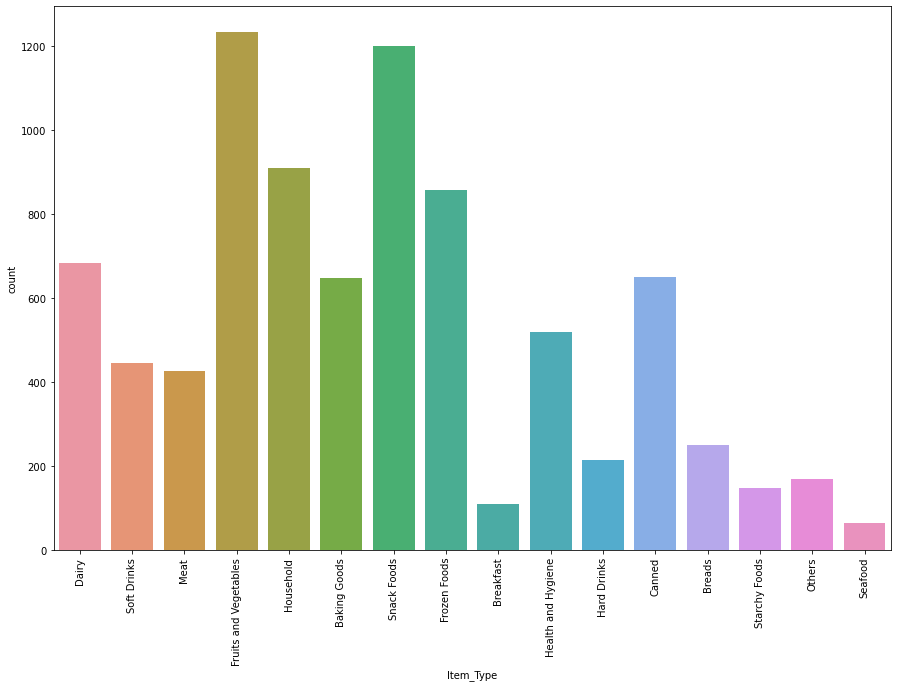

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(df_train.Item_Type)
plt.xticks(rotation=90)

In [17]:
df_train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

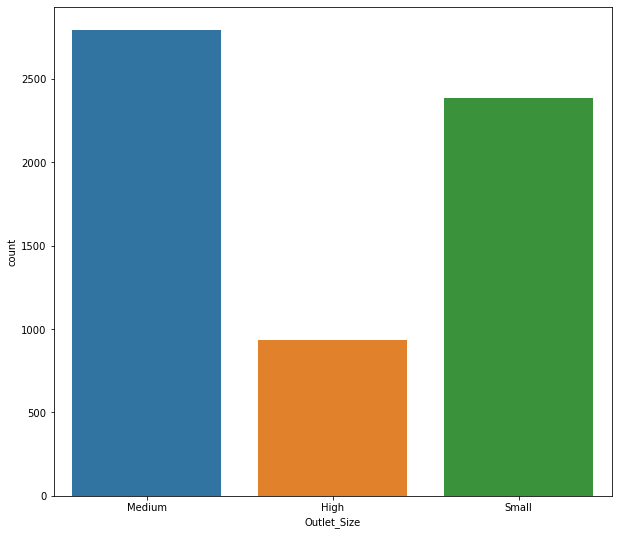

In [18]:
plt.figure(figsize=(10,9))
sns.countplot(df_train.Outlet_Size)

Observation : It can be seen that meddium size outlet are more than high and small size outlet.

In [19]:
df_train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

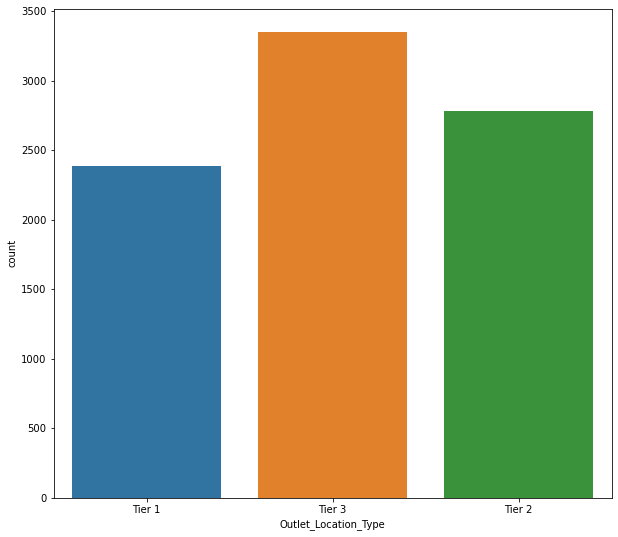

In [20]:
plt.figure(figsize=(10,9))
sns.countplot(df_train.Outlet_Location_Type)

#Observation :Tier 3 has more outlet

In [21]:
df_train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

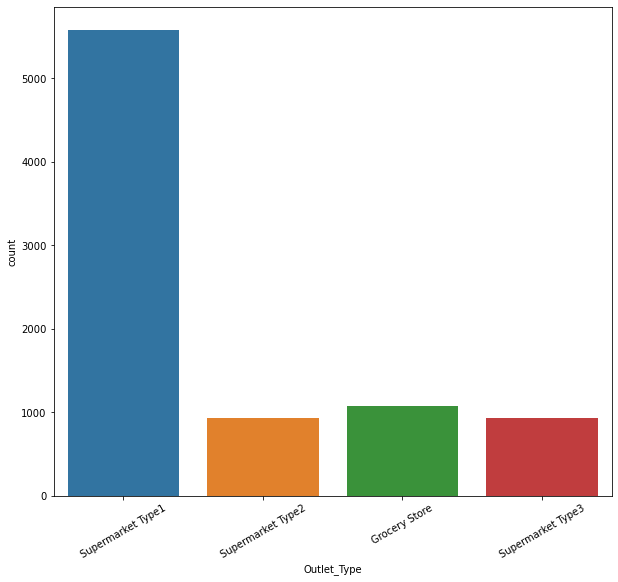

In [22]:
plt.figure(figsize=(10,9))
sns.countplot(df_train.Outlet_Type)
plt.xticks(rotation=30)

Observation : Supermarket has more outlet type

In [23]:
df_train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [24]:
df_train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:title={'center':'Item_Weight and Item_Outlet_Sales'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

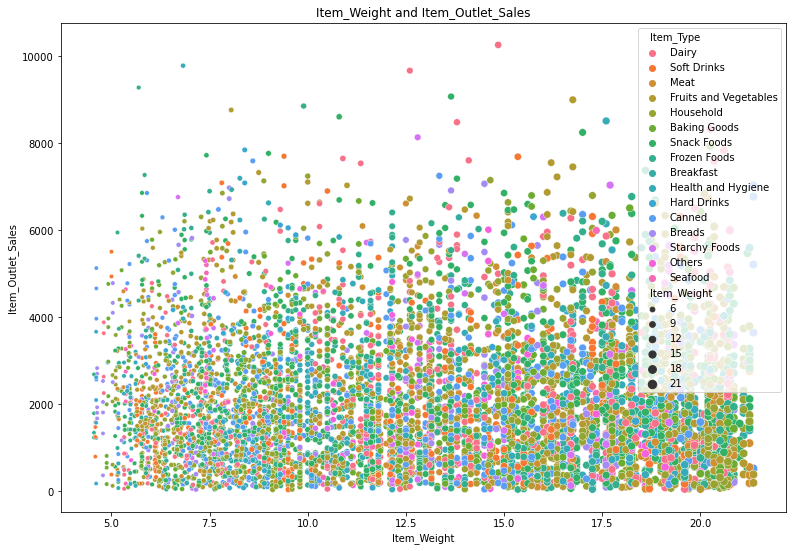

In [25]:
plt.figure(figsize=(13,9))
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Weight and Item_Outlet_Sales')
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=df_train)

Observation :This plot shows us sales of outlet sales and item Weight. we can also see the product color given to the each Item

<AxesSubplot:title={'center':'Item_Visibility and Item_Outlet_Sales'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

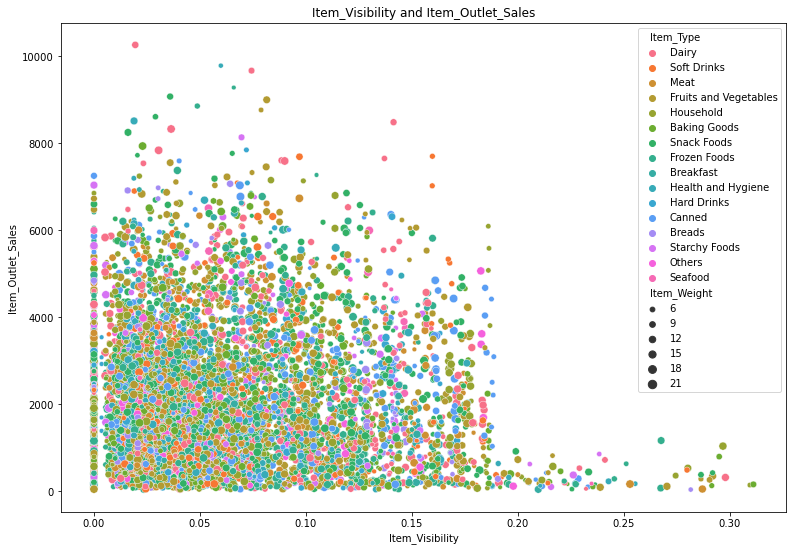

In [26]:
plt.figure(figsize=(13,9))
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Visibility and Item_Outlet_Sales')
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=df_train)

Observation : This plot shows us sales of outlet sales and item visibility. we can also see the product color given to the each Item

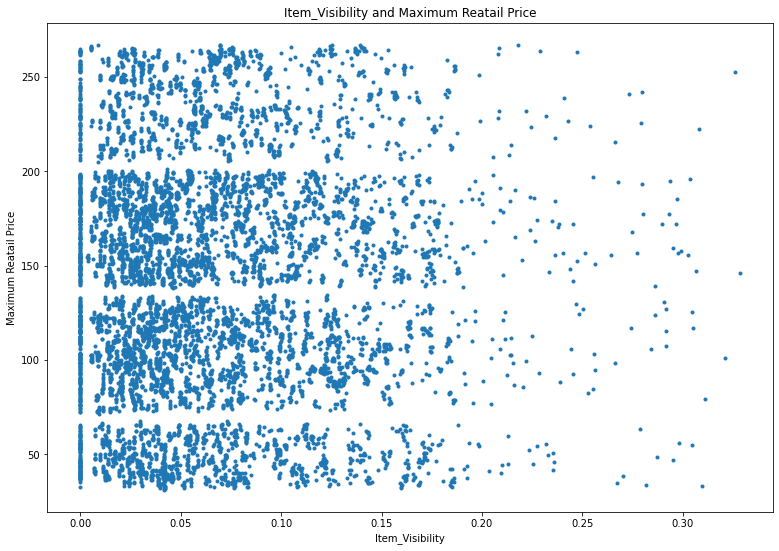

In [27]:
plt.figure(figsize=(13,9))
plt.xlabel('Item_Visibility')
plt.ylabel('Maximum Reatail Price')
plt.title('Item_Visibility and Maximum Reatail Price')
plt.plot(df_train.Item_Visibility,df_train.Item_MRP,".",alpha=1.0
        )

In [28]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


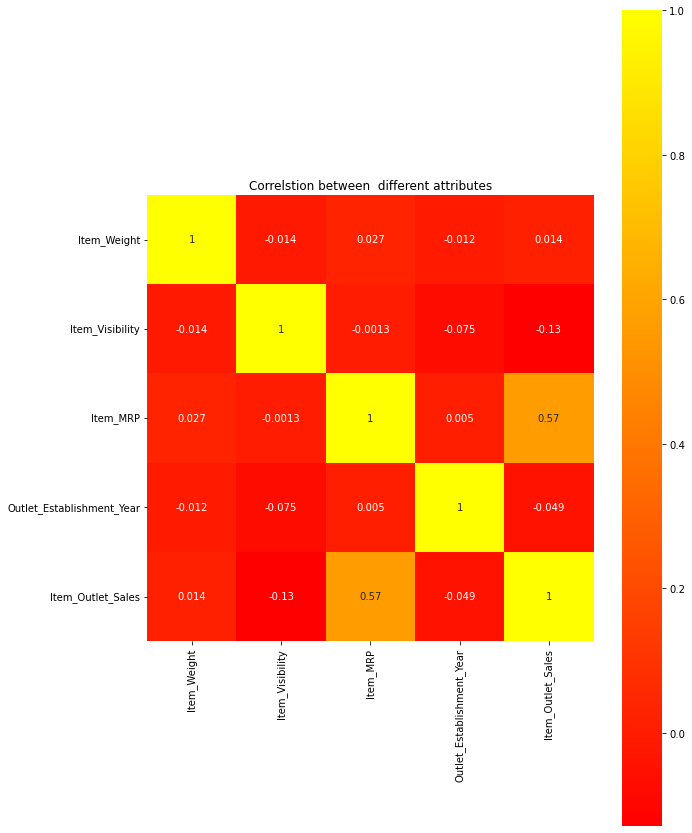

In [29]:
plt.figure(figsize=(10,15))
sns.heatmap(df_train.corr(),annot=True,vmax=1,square=True,cmap='autumn')
plt.title('Correlstion between  different attributes')
plt.show()

In [30]:
Item_Fat_Content_pivot = \
df_train.pivot_table(index="Item_Fat_Content", values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot

,Item_Outlet_Sales
Item_Fat_Content,
LF,1797.6600
Low Fat,1765.7016
Regular,1845.5976
low fat,1614.2321
reg,1492.7236


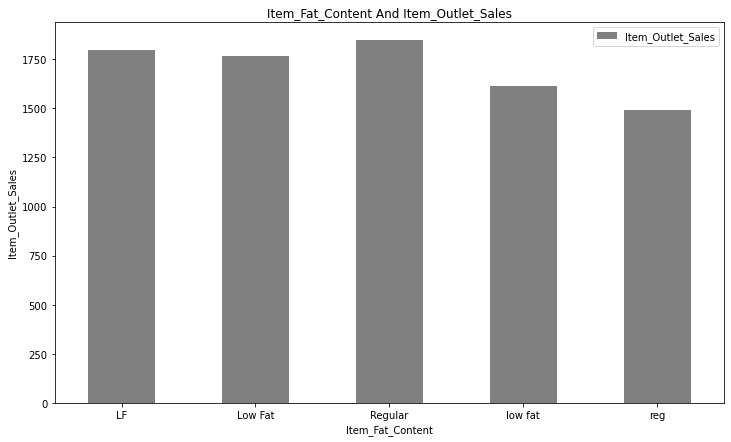

In [31]:
Item_Fat_Content_pivot.plot(kind='bar', color='grey',figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Fat_Content And Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

 Observation : This is visulization of all Fat data given, But for our simplicity we are converting it like follows.

In [33]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [34]:
df['Item_Fat_Content']= df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [35]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [36]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

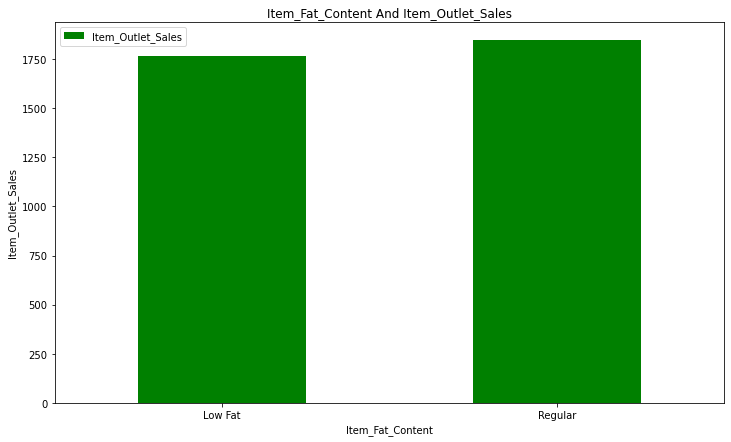

In [37]:
Item_Fat_Content_pivot = \
df_train.pivot_table(index="Item_Fat_Content", values="Item_Outlet_Sales", aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Fat_Content And Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

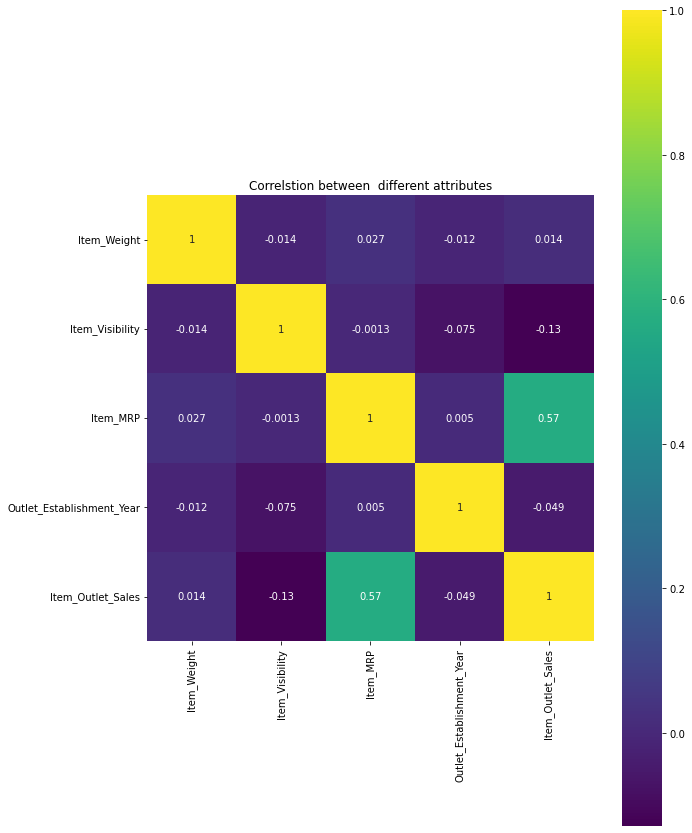

In [38]:
plt.figure(figsize=(10,15))
sns.heatmap(df_train.corr(),annot=True,vmax=1,square=True,cmap='viridis')
plt.title('Correlstion between  different attributes')
plt.show()

Observation : It can be seen that correlation of among variables after some changes

# Filling null values in some attributes

In [39]:
df['Item_Weight'].mean()

12.792854228644991

In [40]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [41]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [42]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [43]:
df['Item_Outlet_Sales'].mean()

2181.2889135750365

In [44]:
df['Item_Outlet_Sales'].fillna(df['Item_Outlet_Sales'].mean(),inplace=True)

Observation : Here we are filling data with mean of item outlet sales and right below we can see that how many null value are their in df data set which is now Zero and now we can make model for prediction but we need few more correction so we will do it furthe

In [45]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [46]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

In [47]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(),inplace=True)

In [48]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [49]:
df['Outlet_Years']=2009-df['Outlet_Establishment_Year']

In [50]:
df['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

In [51]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [52]:
df['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [53]:
df['New_Item_type'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [54]:
df['New_Item_type'] = df['New_Item_type'].map({'FD':'Food','NC':'Non_Consumable','DR':'Drinks'})
df['New_Item_type'].value_counts()

Food              10201
Non_Consumable     2686
Drinks             1317
Name: New_Item_type, dtype: int64

In [55]:
df.loc[df['New_Item_type'] == "Non_Consumable",'Item_Fat_Content']="Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [56]:

item_visib_avg = df.pivot_table(values='Item_Visibility',index='Item_Identifier')

In [57]:
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [58]:
function = lambda x:x['Item_Visibility']/item_visib_avg['Item_Visibility'][item_visib_avg.index == x['Item_Identifier']][0]
df['item_visib_avg'] = df.apply(function,axis=1).astype(float)

In [59]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train,10,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train,0,Drinks,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train,10,Food,0.960069
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Train,11,Food,0.000000
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train,22,Non_Consumable,0.000000


In [60]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df['Outlet']= label.fit_transform(df['Outlet_Identifier'])
varib = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','source','New_Item_type','Outlet_Type','Outlet','Item_Identifier','Outlet_Identifier']
for i in varib:
    df[i]=label.fit_transform(df[i])

In [61]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg,Outlet
0,156,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380,1,10,1,0.931078,9
1,8,5.92,2,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228,1,0,0,0.933420,3
2,662,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700,1,10,1,0.960069,9
3,1121,19.20,2,0.000000,Fruits and Vegetables,182.0950,0,1998,1,2,0,732.3800,1,11,1,0.000000,0
4,1297,8.93,1,0.000000,Household,53.8614,1,1987,0,2,1,994.7052,1,22,2,0.000000,1


In [62]:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet'])
df.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                         int32
Outlet_Years                   int64
item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_type_0                uint8
New_Item_type_1                uint8
New_Item_type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
O

In [63]:
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,156,9.30,0.016047,Dairy,249.8092,9,1999,3735.138000,1,10,...,0,0,0,0,0,0,0,0,0,1
1,8,5.92,0.019278,Soft Drinks,48.2692,3,2009,443.422800,1,0,...,0,0,0,1,0,0,0,0,0,0
2,662,17.50,0.016760,Meat,141.6180,9,1999,2097.270000,1,10,...,0,0,0,0,0,0,0,0,0,1
3,1121,19.20,0.000000,Fruits and Vegetables,182.0950,0,1998,732.380000,1,11,...,1,0,0,0,0,0,0,0,0,0
4,1297,8.93,0.000000,Household,53.8614,1,1987,994.705200,1,22,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233,10.50,0.013496,Snack Foods,141.3154,8,1997,2181.288914,0,12,...,0,0,0,0,0,0,0,0,1,0
14200,308,7.60,0.142991,Starchy Foods,169.1448,3,2009,2181.288914,0,0,...,0,0,0,1,0,0,0,0,0,0
14201,1426,10.00,0.073529,Health and Hygiene,118.7440,7,2002,2181.288914,0,7,...,0,0,0,0,0,0,0,1,0,0
14202,521,15.30,0.000000,Canned,214.6218,2,2007,2181.288914,0,2,...,0,0,1,0,0,0,0,0,0,0


In [64]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

# Creating train_test_split

In [65]:
x = df.drop('Item_Outlet_Sales', axis=1)
df['Item_Outlet_Sales']= df['Item_Outlet_Sales'].astype('category')
y = df['Item_Outlet_Sales']

df.drop('Item_Identifier', axis=1,inplace=True)
df.drop('source', axis=1,inplace=True)
df.drop('Outlet_Identifier', axis=1,inplace=True)


In [66]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [78]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=43)
y_test.shape

(4262,)

# Apply Linear Regression & Different classifier

In [79]:
import sklearn
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import explained_variance_score,r2_score,mean_tweedie_deviance
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

model=[Ridge(alpha=.4),LinearRegression(), Lasso(), DecisionTreeRegressor(max_depth=15,min_samples_leaf=100),RandomForestRegressor(n_estimators=500,max_depth=6,min_samples_leaf=50,n_jobs=4)]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(' Score = \n',m,'is :')
    print(explained_variance_score(y_test,predm))
    print(r2_score(y_test,predm))
    print(mean_tweedie_deviance(y_test,predm))
    print('\n')

 Score = 
 Ridge(alpha=0.4) is :
0.34118466682919635
0.3411824165212113
1211046.9041150226


 Score = 
 LinearRegression() is :
0.3411888152083914
0.3411865676522009
1211039.2734529704


 Score = 
 Lasso() is :
0.3409460269829875
0.34094337570220656
1211486.3120043569


 Score = 
 DecisionTreeRegressor(max_depth=15, min_samples_leaf=100) is :
0.5934746204397433
0.5934742750401782
747280.7845474848


 Score = 
 RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_estimators=500,
                      n_jobs=4) is :
0.6022738715824645
0.6022667750317574
731118.2986617751




# Random forest Regressor will be the best for this dataset.